In [1]:
library('palmerpenguins')
library('tidyverse')
library('tidymodels')

theme_set(theme_grey(base_size = 14))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.4     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.3
✔ modeldata    1.1.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.4     ✔ yardstick    1.1.0
✔ recipes      1.0.5     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## Simple model with one categorical predictor variable

In the previous notebook, we learned how to create a simple regression model with a single numerical explanatory variable. In this notebook, we will make a model with a categorical predictor.

Let's say we want to predict penguin body mass by penguing species.

In [2]:
penguins |> head()

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
Adelie,Torgersen,39.1,18.7,181,3750,male
Adelie,Torgersen,39.5,17.4,186,3800,female
Adelie,Torgersen,40.3,18.0,195,3250,female
Adelie,Torgersen,NA,NA,NA,NA,NA
Adelie,Torgersen,36.7,19.3,193,3450,female
Adelie,Torgersen,39.3,20.6,190,3650,male


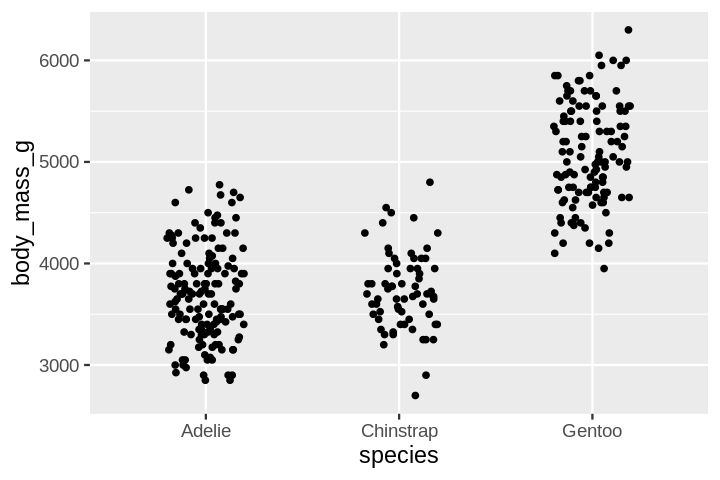

In [3]:
options(repr.plot.height = 4, repr.plot.width = 6)

ggplot(penguins, aes(x = species, y = body_mass_g)) + 
    geom_point(na.rm = T, position = position_jitter(height = 0, width = 0.2))

Instead of a continuous line, we can think of this model as three baseline mass values for each of the three species categories. That is, if we know a pengion is a member of the "Gentoo" species, the model would predict that penguin has a mass equal to the most likely mass for Gentoo penguins. 

The model syntax is identical to our model with a continuous predictor.

We, 
1. Pick a model type (`linear_reg`)
1. Set the computational engine ('lm')
1. Fit the model with our data

In [4]:
mod = linear_reg() |> set_engine('lm')

mod_fit = mod |> fit(body_mass_g ~ species, data = penguins)

tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),3700.66225,37.61935,98.3712321,2.488024e-251
speciesChinstrap,32.42598,67.51168,0.4803018,6.313226e-01
speciesGentoo,1375.35401,56.14797,24.4951686,5.420612e-77


And, like before, we can produce predictions.

In [5]:
penguins2 = augment(mod_fit, new_data = penguins) |> 
    select(species, .pred, body_mass_g)

penguins2 |> head()

species,.pred,body_mass_g
<fct>,<dbl>,<int>
Adelie,3700.662,3750
Adelie,3700.662,3800
Adelie,3700.662,3250
Adelie,3700.662,NA
Adelie,3700.662,3450
Adelie,3700.662,3650


Note that the prediction is the same for all penguins of the same species. Let's make a smaller and simpler "prediction" table for visualizaing this model.

In [6]:
sample_data = data.frame(
    species = c('Adelie', 'Gentoo', 'Chinstrap')
)

mass_predictions = augment(mod_fit, new_data = sample_data)

mass_predictions

species,.pred
<chr>,<dbl>
Adelie,3700.662
Gentoo,5076.016
Chinstrap,3733.088


Now we can plot the model. The blue lines represent the model prediction based on each category value.

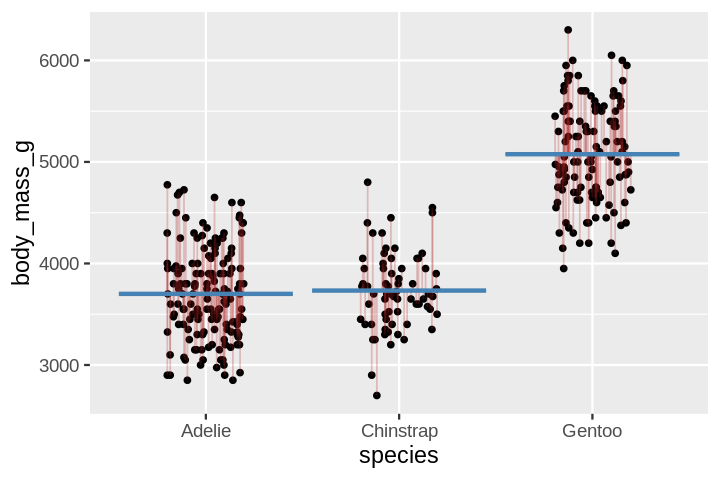

In [9]:
ggplot(penguins2) + 
    geom_point(aes(x = species, y = body_mass_g), 
               na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42)) +
    geom_segment(aes(x = species, xend = species, y = body_mass_g, yend = .pred), 
                 na.rm = T, position = position_jitter(height = 0, width = 0.2, seed = 42), 
                 color = 'firebrick',
                 alpha = 0.25) +
    geom_crossbar(aes(x = species, y = .pred, ymin = .pred, ymax = .pred), 
                  data = mass_predictions,
                  color = 'steelblue')